In [38]:
import pandas as pd
import numpy as np
import torch
import torch.nn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import math
import warnings
warnings.filterwarnings('ignore')
from torch import nn

In [39]:
import pickle

In [40]:
weight = 0.7
bias = 0.3

start = 0

end = 1

step = 0.02
X = torch.arange(start ,end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [41]:
#Spiliting Data into Training and Testing Data (Very important concept in ML in General)

#Lets create Training and Testing set

train_split = int(0.8 * len(X))
train_split



40

In [42]:
X_train , y_train = X[:train_split] , y[:train_split] #: before means up until that point and ':' after means samples take from that point onwards
X_test, y_test = X[train_split:], y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [43]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
    plt.figure(figsize=(10,7))
    #Plotting the training Data
    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    #Plotting the Test Data in Green
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")
    #Are there any predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4 , label="Predictions")

    plt.legend(prop={"size": 14});

In [44]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [45]:
model_0 = LinearRegressionModel()

In [46]:
torch.manual_seed(42)

In [47]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [48]:
model_0

LinearRegressionModel()

In [49]:
#L1 Loss in PyTorch is also known as Mean Absolute Error(MAE)

#Setting up a Loss Function

loss_fn = nn.L1Loss()

#Setting up an Optimizer (Stochastic Gradient Descent)

#Smaller the learning rate, smaller the change in the parameter; Larger the learning rate, larger the change in the parameter.

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01 )









In [50]:
#Training Loop

epochs = 1

for epoch in range(epochs):
  model_0.train()
  #1 Step Forward Pass
  y_pred = model_0(X_train)
  #2 Step Calculate the Loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  #3 Optimizer Grad
  optimizer.zero_grad()
  #4 Perform Backpropagation
  loss.backward()
  #5. Gradient Descent
  optimizer.step()
  #Model Evaluation
  model_0.eval()
  #Print out the Model
  print(model_0.state_dict())


Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


In [51]:
epochs = 300
#Track different Values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #Train Model
  model_0.train()
  #1 Step Forward Pass
  y_pred = model_0(X_train)
  #2 Step up a Loss Function
  loss = loss_fn(y_pred, y_train)
  #3 Step up Optimizer Grad
  optimizer.zero_grad()
  #4 Peform Backpropagation
  loss.backward()
  #5 Perform Gradient Descent
  optimizer.step()
  #Model Evaluation
  #Testing Part
  model_0.eval()
  with torch.inference_mode():
    #1 Do forward pass
    test_pred  = model_0(X_test)
    #2 Calculate the test Loss
    test_loss = loss_fn(test_pred, y_test)
    #What is Happening?
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch}| Loss: {loss}| Test Loss: {test_loss}")
       #print out the model
      print(model_0.state_dict())



Epoch: 0| Loss: 0.3013603389263153| Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10| Loss: 0.18615034222602844| Test Loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20| Loss: 0.08227583020925522| Test Loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30| Loss: 0.05181945487856865| Test Loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40| Loss: 0.04503796249628067| Test Loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50| Loss: 0.04132963344454765| Test Loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60| Loss: 0.03785243630409241| Test Loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))])
Epoch: 70| 

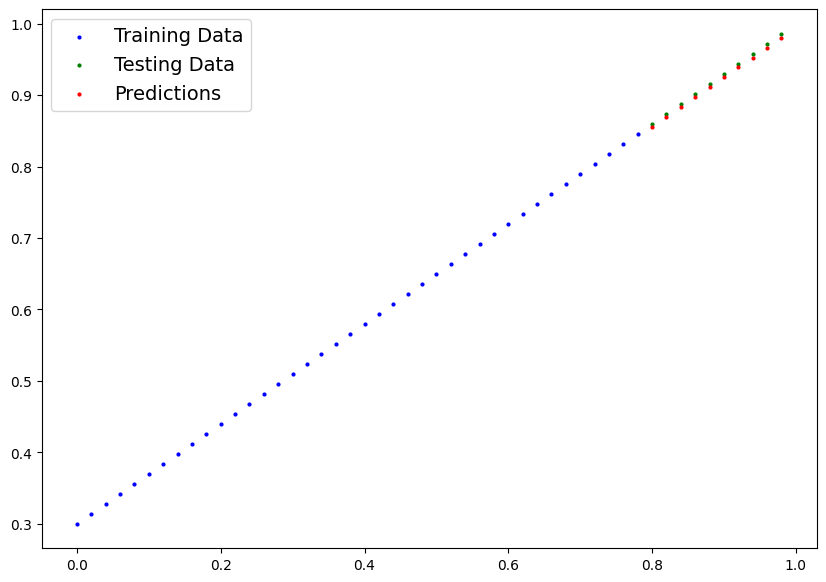

In [52]:
plot_predictions(predictions = model_0(X_test).detach().numpy())

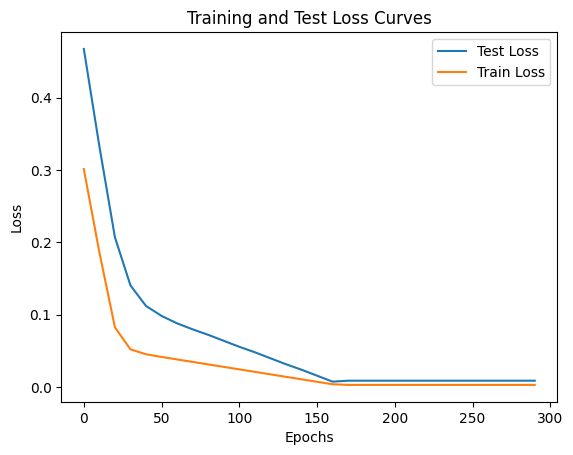

In [53]:
#Plotting Loss and Test Loss with respect to Epochs
plt.plot(epoch_count, [loss.detach().numpy() for loss in test_loss_values], label="Test Loss")
plt.plot(epoch_count, [loss.detach().numpy() for loss in loss_values], label="Train Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [54]:
#Saving and Loading a model. Use of python pickle to save and load i.e. serializing and deserializing

model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [55]:
#Saving Our PyTorch Model
from pathlib import Path
import pathlib
print(f"Using pathlib from: {pathlib.__file__}")
print(f"Pathlib version (if available): {getattr(pathlib, '__version__', 'N/A')}")

#Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok= True)

#Create Model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#Save the Model Save Dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f = MODEL_SAVE_PATH)



Using pathlib from: /usr/lib/python3.11/pathlib.py
Pathlib version (if available): N/A
Saving model to: models/01_pytorch_workflow_model.pth


In [56]:
#Loading a Pytorch Model:

model_0.state_dict()

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))




loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds








tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]], grad_fn=<AddBackward0>)

In [57]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [58]:
y_preds = loaded_model_preds

**Putting it All  Together**





In [59]:
print(torch.__version__)

2.6.0+cu124


In [60]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**Redoing All the Steps for Device Agnostic Code**

**Data**

In [61]:
#Use Linear Regression Formula:  y = weight  * X + bias

weight = 0.7
bias = 0.3
 #Create Range Values
start = 0

end = 1

step = 0.02

#Create X and Y (Labels and Features)

X = torch.arange(start, end, step).unsqueeze(dim=1)  #Without Unsqueeze errors will pop up

y = weight * X + bias

X[:10] , y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [62]:
#Split Data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [63]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
    plt.figure(figsize=(10,7))
    #Plotting the training Data
    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    #Plotting the Test Data in Green
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")
    #Are there any predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4 , label="Predictions")

    plt.legend(prop={"size": 14});

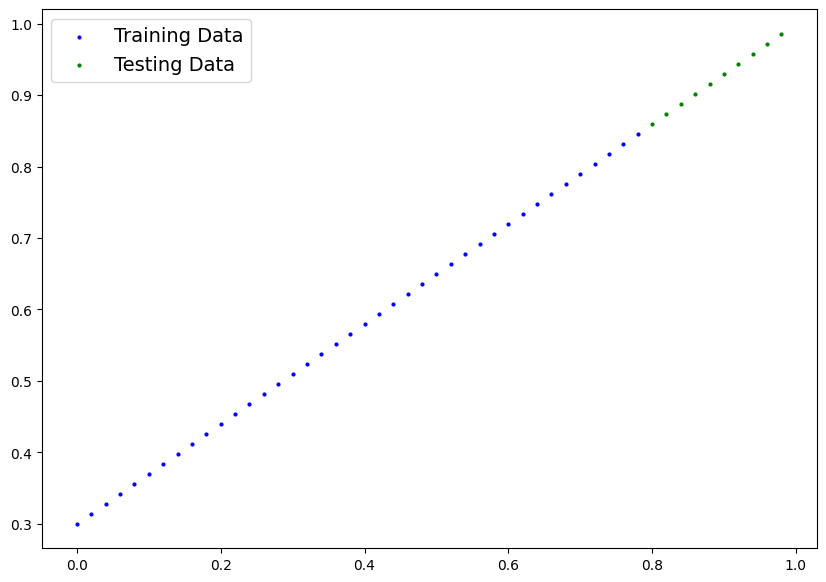

In [64]:
#Mapping Predictions

plot_predictions(X_train, y_train, X_test, y_test)

In [65]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear_layer = nn.Linear(in_features=1, out_features=1)
  #Use nn.Linear() for creating model parameters / also called: Linear Transform, probing Layer, fully connected layer , Dense Layer,
  def forward(self, x) -> torch.Tensor:
    return self.Linear_layer(x)

#Set Manual Seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1 , model_1.state_dict()

(LinearRegressionModelV2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [66]:
#For Training a PyTorch Model We need:
#1. Loss Function
#2. Optimizer
#3. Training Loop
#4. Testing Loop

loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.01)




In [68]:
#Lets write a training Loop

torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()
  #1 Do a forward pass
  y_pred = model_1(X_train)
  #2 Calculate the Loss
  loss = loss_fn(y_pred , y_train)
  #3 Optimize the Zero Grad
  optimizer.zero_grad()

  #4 Perform BackPropagation
  loss.backward()

  #5 Gradient Descent
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_1.state_dict())



Epoch: 0 | Loss: 0.001849935157224536 | Test Loss: 0.001424765563569963
OrderedDict([('Linear_layer.weight', tensor([[0.6966]])), ('Linear_layer.bias', tensor([0.3016]))])
Epoch: 10 | Loss: 0.003051328007131815 | Test Loss: 0.0010924100643023849
OrderedDict([('Linear_layer.weight', tensor([[0.7008]])), ('Linear_layer.bias', tensor([0.2982]))])
Epoch: 20 | Loss: 0.0005767546826973557 | Test Loss: 0.0006606102106161416
OrderedDict([('Linear_layer.weight', tensor([[0.7008]])), ('Linear_layer.bias', tensor([0.2986]))])
Epoch: 30 | Loss: 0.0011658377479761839 | Test Loss: 0.002497774315997958
OrderedDict([('Linear_layer.weight', tensor([[0.6973]])), ('Linear_layer.bias', tensor([0.2999]))])
Epoch: 40 | Loss: 0.0017257288563996553 | Test Loss: 0.0021286786068230867
OrderedDict([('Linear_layer.weight', tensor([[0.7007]])), ('Linear_layer.bias', tensor([0.3015]))])
Epoch: 50 | Loss: 0.001688865595497191 | Test Loss: 0.0030755221378058195
OrderedDict([('Linear_layer.weight', tensor([[0.7027]]))

In [70]:
#Evaluate the model

model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.6987]])),
             ('Linear_layer.bias', tensor([0.2983]))])

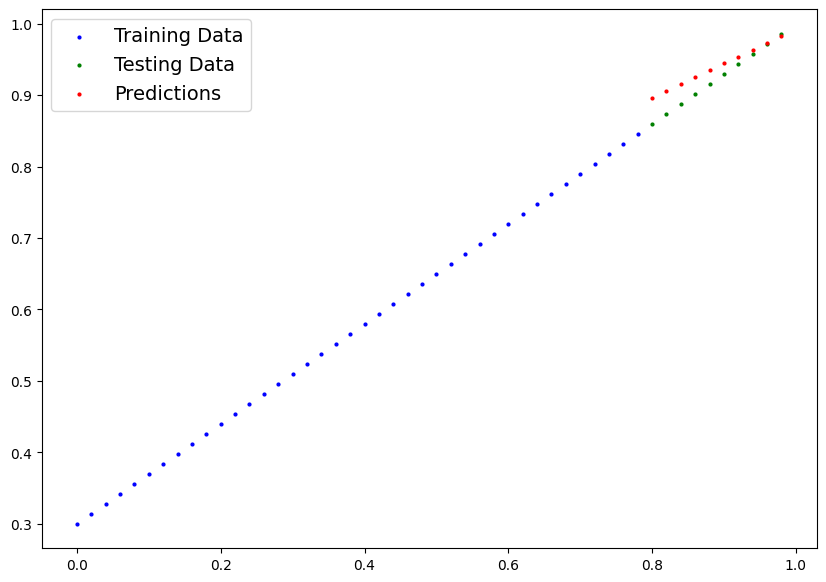

In [73]:
#Check out the predictions
plot_predictions(predictions= model_1(y_preds).detach().numpy())